In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
import joblib
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
Employee = pd.read_csv(r'C:\Users\hp\Downloads\bct-data-summit\train.csv')

In [3]:
Employee

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,1672,30,Travel_Rarely,945,Sales,1,3,Life Sciences,1,4,Female,73,3,3,Sales Executive,3,Single,8722,14255,1,Y,No,19,3,2,80,0,10,2,4,10,0,0,8,0
1673,1673,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,1,Male,48,3,1,Research Scientist,2,Married,3544,15972,4,Y,No,19,3,4,80,1,10,3,4,4,2,1,3,0
1674,1674,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,1,2,Male,36,2,1,Human Resources,1,Married,2804,15322,1,Y,Yes,11,3,3,80,0,1,2,3,1,0,0,0,1
1675,1675,36,Travel_Rarely,441,Sales,9,2,Marketing,1,2,Male,48,4,2,Sales Executive,3,Divorced,5406,4051,1,Y,No,21,4,3,80,2,10,3,2,10,3,0,8,0


In [4]:
Employee.describe()
# Describe function

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,2.791890,6196.049493,14770.048301,2.574836,14.903399,3.127609,2.751342,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,1.097396,4520.050754,7112.203888,2.480215,3.420801,0.333753,1.077905,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1010.000000,636.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,2.000000,2875.000000,8509.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,3.000000,4834.000000,15332.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,4.000000,7403.000000,20990.000000,4.000000,17.000000,3.000000,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,4.000000,19973.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [5]:
Employee.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [6]:
Employee.shape

(1677, 35)

In [7]:
Employee.isnull().any()

id                          False
Age                         False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalanc

In [8]:
Employee.duplicated().any()
#  Check for duplicates

False

In [9]:
Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [10]:
Employee.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,2.791890,6196.049493,14770.048301,2.574836,14.903399,3.127609,2.751342,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,1.097396,4520.050754,7112.203888,2.480215,3.420801,0.333753,1.077905,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1010.000000,636.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,2.000000,2875.000000,8509.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,3.000000,4834.000000,15332.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,4.000000,7403.000000,20990.000000,4.000000,17.000000,3.000000,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,4.000000,19973.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


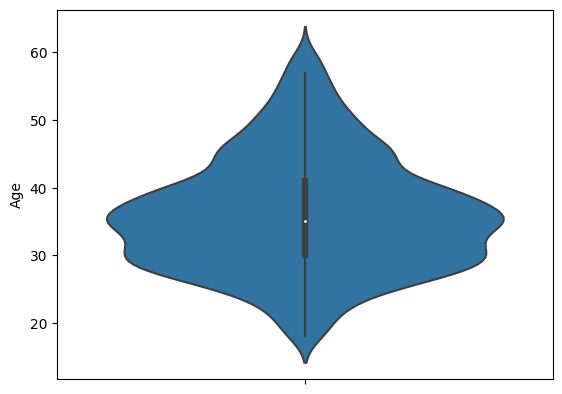

In [11]:
sns.violinplot(data=Employee, y='Age')
plt.show()
# The age column is normally distributed

<Figure size 1200x2700 with 0 Axes>

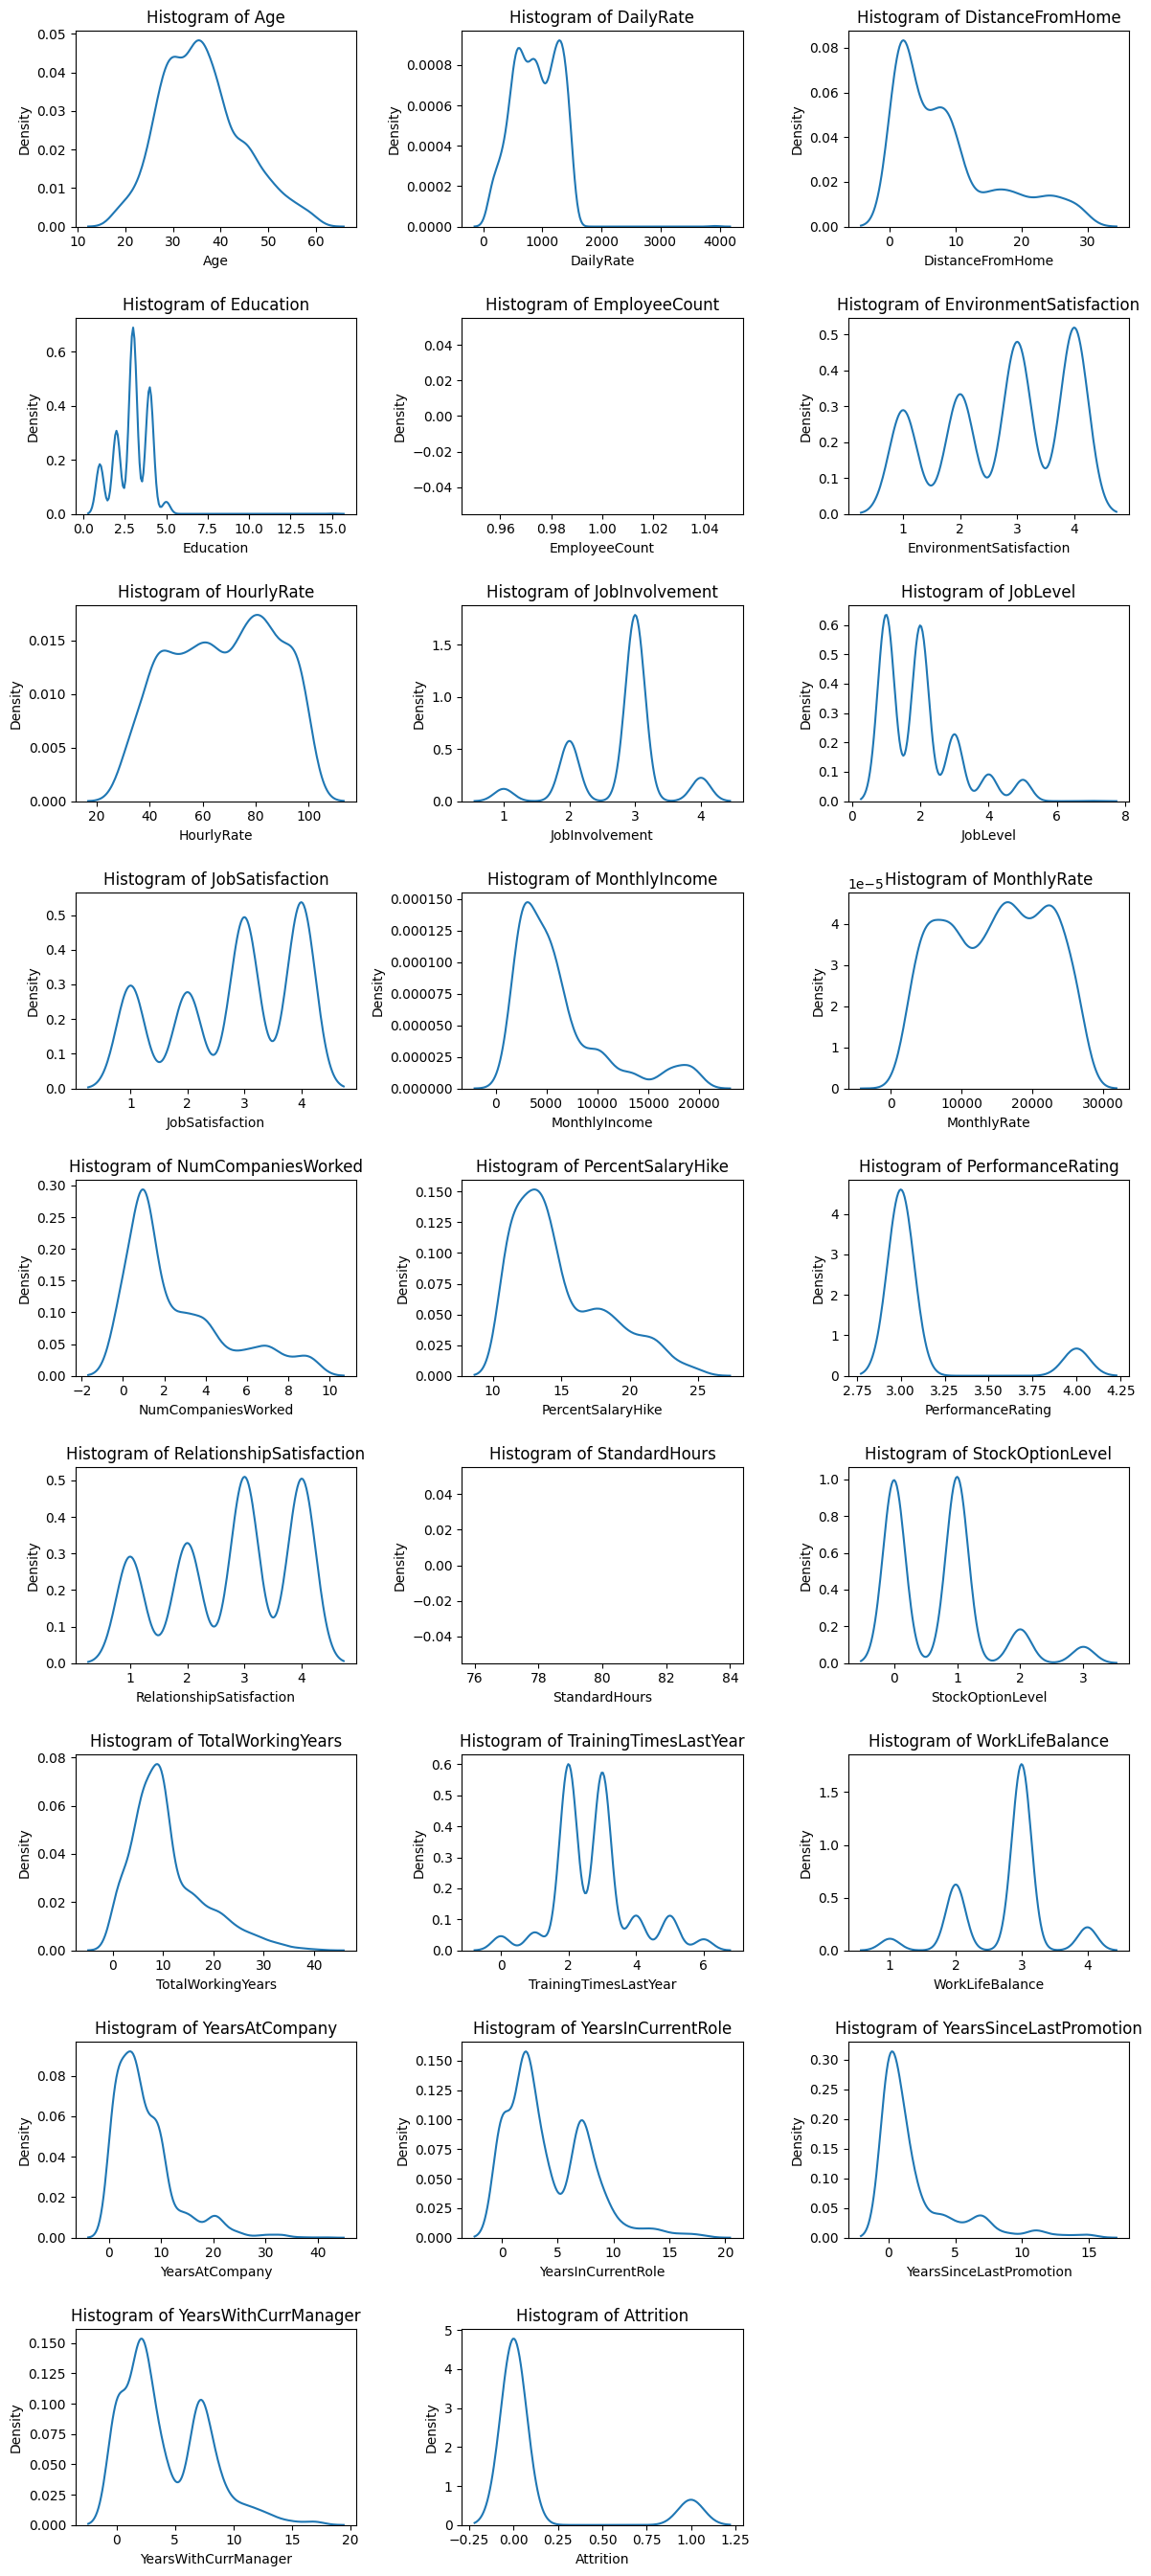

In [10]:
num_var = list(Employee.select_dtypes(include='int'))
num_var = num_var[1:]

# Calculate the number of rows and columns needed based on the number of numerical variables
num_rows = len(num_var) // 3 + (len(num_var) % 3 > 0)
num_cols = min(len(num_var), 3)

plt.figure(figsize=(12, 3 * num_rows))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))

for i, var in enumerate(num_var):
    row, col = i // num_cols, i % num_cols
    sns.distplot(Employee[var], hist=False, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {var}')

# Remove empty subplots if there are more than needed
for i in range(len(num_var), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


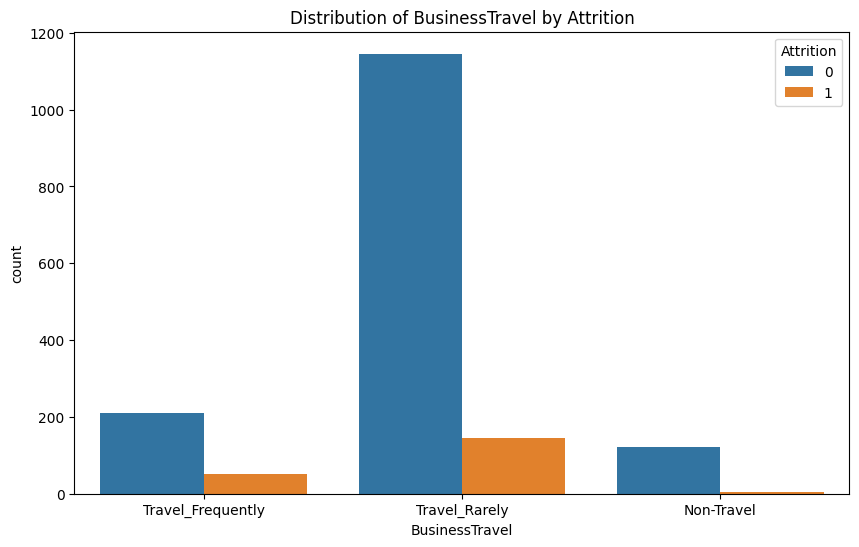

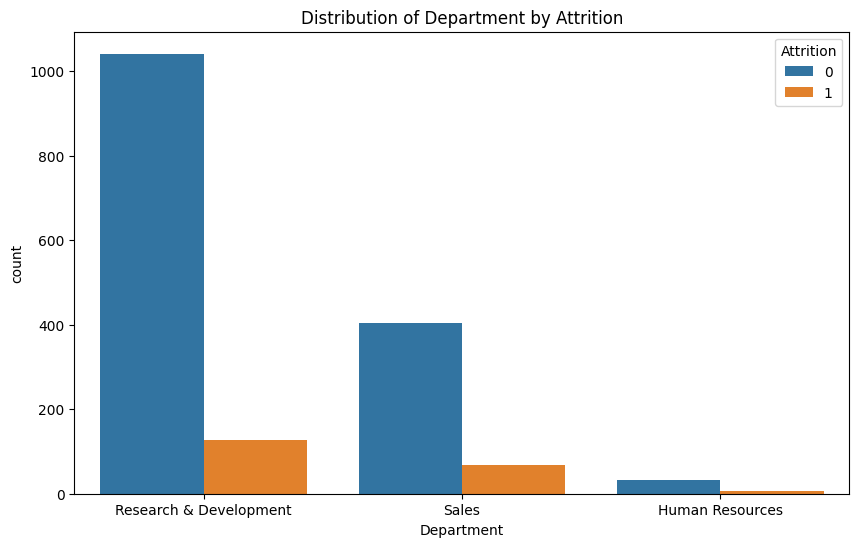

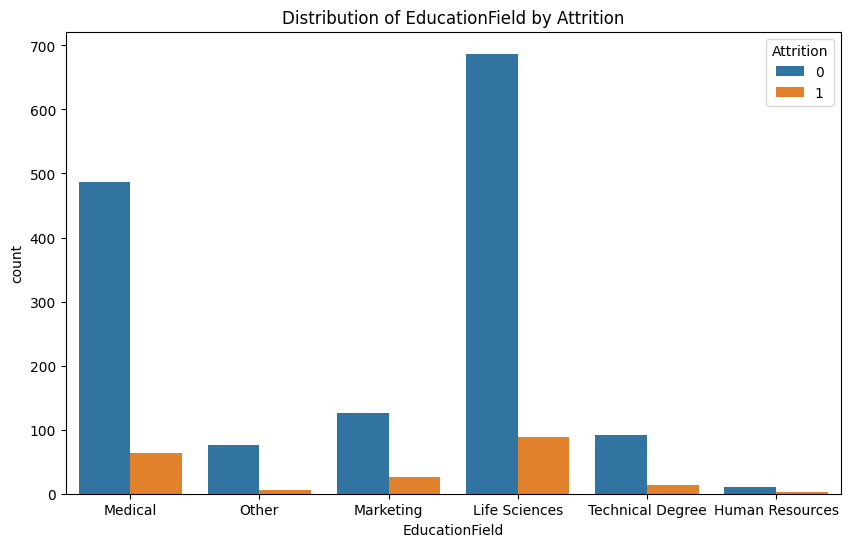

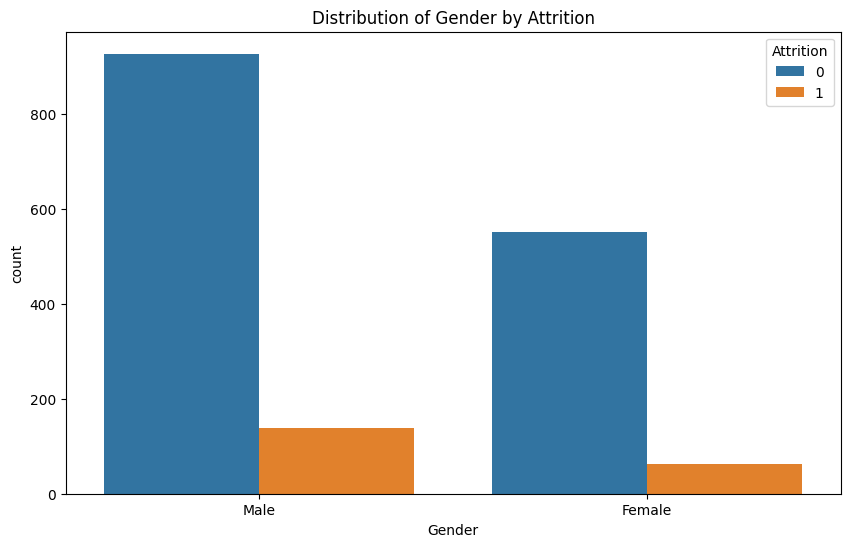

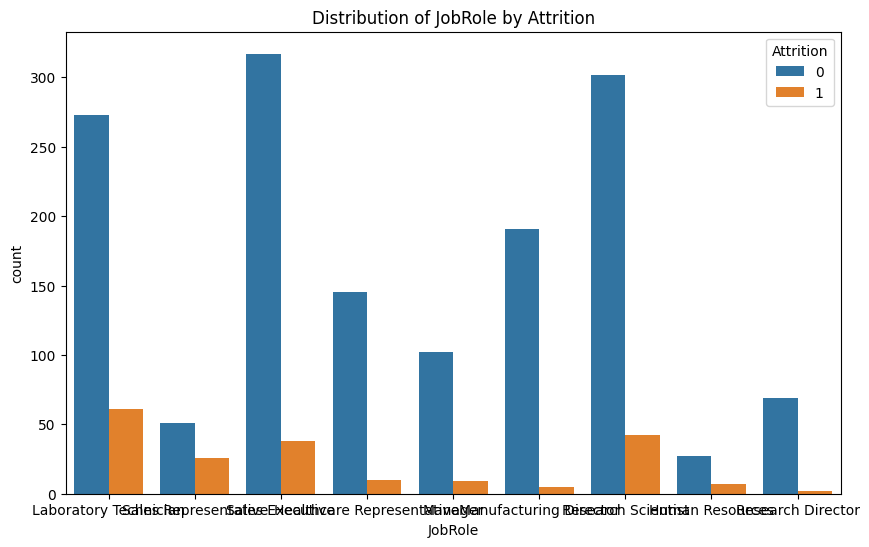

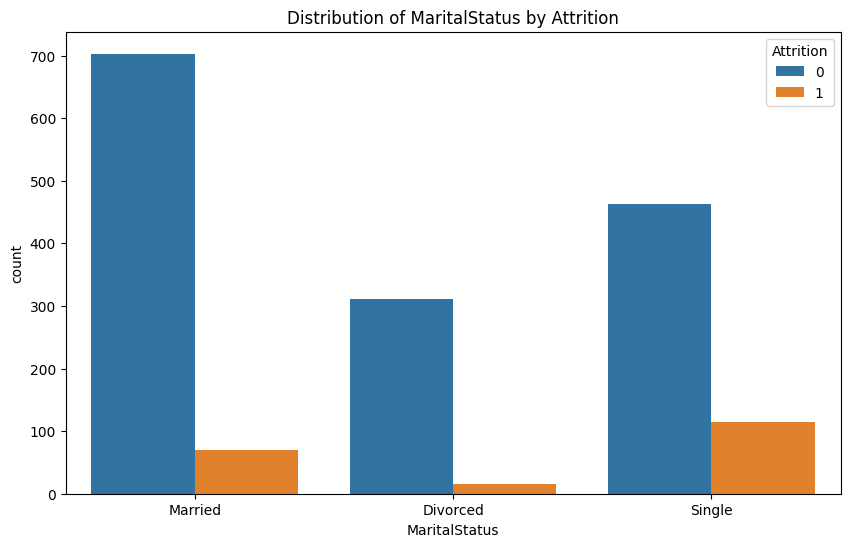

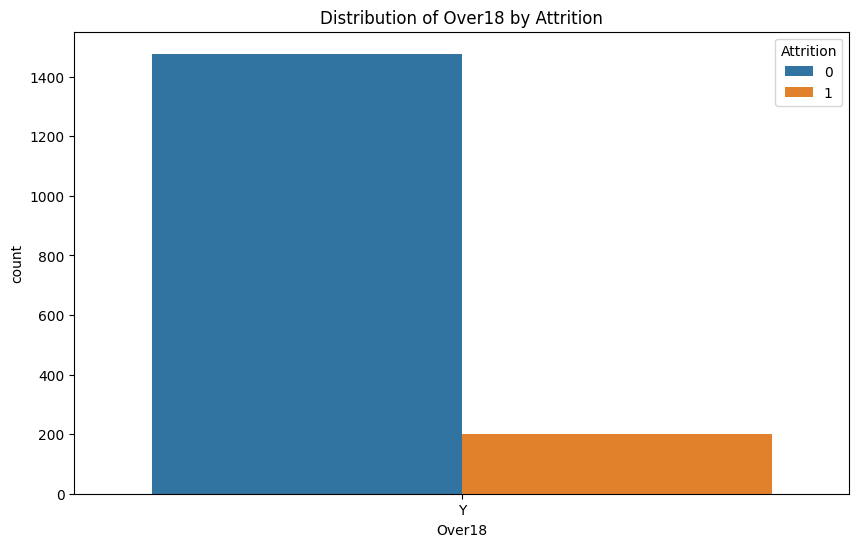

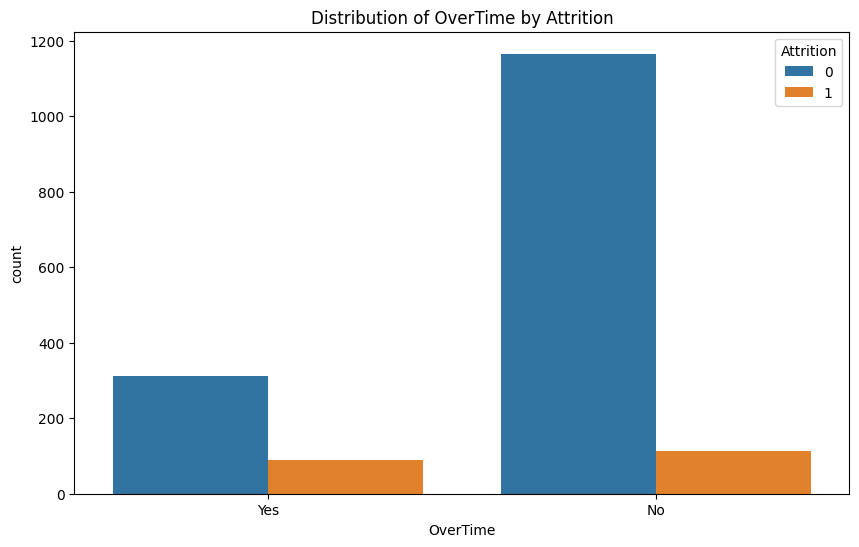

In [12]:
categorical_columns = Employee.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Attrition', data=Employee)
    plt.title(f'Distribution of {column} by Attrition')
    plt.xticks(rotation = 45)
    plt.show()

In [13]:
Employee.groupby('MaritalStatus')['Attrition'].mean()#.plot(kind = 'bar')

MaritalStatus
Divorced    0.048930
Married     0.090556
Single      0.197574
Name: Attrition, dtype: float64

In [14]:
Employee.groupby('JobRole')['Attrition'].mean().sort_values(ascending = False)#.plot(kind = 'barh')

JobRole
Sales Representative         0.337662
Human Resources              0.205882
Laboratory Technician        0.182635
Research Scientist           0.122093
Sales Executive              0.107042
Manager                      0.081081
Healthcare Representative    0.064516
Research Director            0.028169
Manufacturing Director       0.025510
Name: Attrition, dtype: float64

In [15]:
Employee.groupby('EducationField')['Attrition'].mean().sort_values()

EducationField
Other               0.073171
Life Sciences       0.113548
Medical             0.114754
Technical Degree    0.132075
Marketing           0.171053
Human Resources     0.230769
Name: Attrition, dtype: float64

In [16]:
Employee.groupby('Department')['Attrition'].mean().sort_values()

Department
Research & Development    0.107969
Sales                     0.142251
Human Resources           0.179487
Name: Attrition, dtype: float64

In [17]:
Employee.groupby('BusinessTravel')['Attrition'].mean().sort_values(ascending = False)

BusinessTravel
Travel_Frequently    0.195402
Travel_Rarely        0.111628
Non-Travel           0.039683
Name: Attrition, dtype: float64

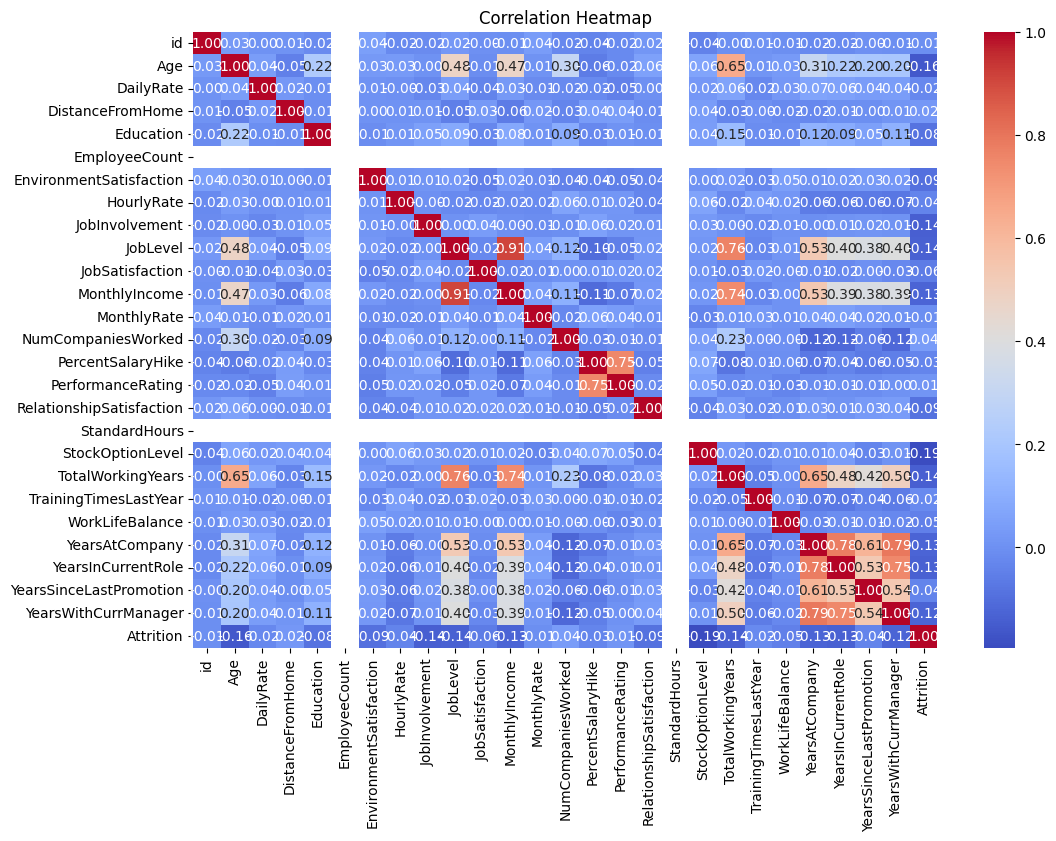

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(Employee.select_dtypes(exclude = 'O').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# checking correlation of numerical var with the target var
num_col = Employee.select_dtypes('int64')
num_col.corr()['Attrition'].sort_values()

StockOptionLevel           -0.194018
Age                        -0.161044
JobInvolvement             -0.139929
TotalWorkingYears          -0.138740
JobLevel                   -0.137238
YearsInCurrentRole         -0.133466
YearsAtCompany             -0.127120
MonthlyIncome              -0.126896
YearsWithCurrManager       -0.124712
EnvironmentSatisfaction    -0.092426
RelationshipSatisfaction   -0.087537
Education                  -0.084305
JobSatisfaction            -0.061010
WorkLifeBalance            -0.045365
YearsSinceLastPromotion    -0.038496
HourlyRate                 -0.037280
PercentSalaryHike          -0.031571
DailyRate                  -0.022380
TrainingTimesLastYear      -0.018595
id                         -0.006598
MonthlyRate                -0.005484
PerformanceRating           0.013666
DistanceFromHome            0.024741
NumCompaniesWorked          0.037127
Attrition                   1.000000
EmployeeCount                    NaN
StandardHours                    NaN
N

In [20]:
df = Employee.copy()

In [21]:
x = df
y = df.pop('Attrition')

In [22]:
for col in x.select_dtypes('O'):
    x[col],_ = x[col].factorize()

In [23]:
mi_scores = mutual_info_regression(x,y, random_state = 0)
mi_scores = pd.Series(mi_scores, name = 'Scores', index = x.columns)
best_features = mi_scores.sort_values(ascending = False).head(17)

<Axes: >

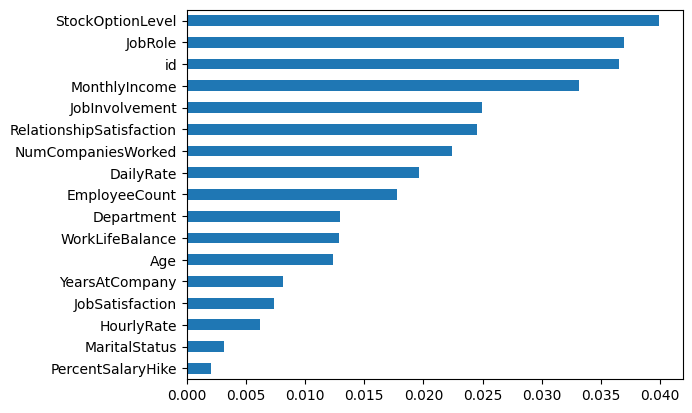

In [24]:
best_features.sort_values(ascending = True).plot(kind = 'barh')

In [25]:
X_train = Employee.loc[:, best_features.index].drop('id', axis = 1)
Y_train = Employee['Attrition']

In [26]:
X_train

,StockOptionLevel,JobRole,MonthlyIncome,JobInvolvement,RelationshipSatisfaction,NumCompaniesWorked,DailyRate,EmployeeCount,Department,WorkLifeBalance,Age,YearsAtCompany,JobSatisfaction,HourlyRate,MaritalStatus,PercentSalaryHike
0,1,Laboratory Technician,2596,3,2,1,599,1,Research & Development,3,36,10,4,42,Married,13
1,1,Sales Representative,2899,3,4,1,921,1,Sales,3,35,4,1,46,Married,17
2,2,Sales Executive,4627,3,4,0,718,1,Sales,3,32,3,4,80,Divorced,17
3,0,Healthcare Representative,5347,3,3,3,1488,1,Research & Development,1,38,6,1,40,Married,14
4,0,Manager,19033,3,3,1,1017,1,Research & Development,3,50,31,1,37,Single,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,0,Sales Executive,8722,3,2,1,945,1,Sales,4,30,10,3,73,Single,19
1673,1,Research Scientist,3544,3,4,4,1303,1,Research & Development,4,32,4,2,48,Married,19
1674,0,Human Resources,2804,2,3,1,1184,1,Human Resources,3,29,1,1,36,Married,11
1675,2,Sales Executive,5406,4,3,1,441,1,Sales,2,36,10,3,48,Divorced,21


#### Feature Encoding

In [27]:
X_train.select_dtypes('O')

,JobRole,Department,MaritalStatus
0,Laboratory Technician,Research & Development,Married
1,Sales Representative,Sales,Married
2,Sales Executive,Sales,Divorced
3,Healthcare Representative,Research & Development,Married
4,Manager,Research & Development,Single
...,...,...,...
1672,Sales Executive,Sales,Single
1673,Research Scientist,Research & Development,Married
1674,Human Resources,Human Resources,Married
1675,Sales Executive,Sales,Divorced


In [28]:
for col in X_train.select_dtypes('O'):
    print(X_train[col].value_counts(), '\n')

JobRole
Sales Executive              355
Research Scientist           344
Laboratory Technician        334
Manufacturing Director       196
Healthcare Representative    155
Manager                      111
Sales Representative          77
Research Director             71
Human Resources               34
Name: count, dtype: int64 

Department
Research & Development    1167
Sales                      471
Human Resources             39
Name: count, dtype: int64 

MaritalStatus
Married     773
Single      577
Divorced    327
Name: count, dtype: int64 



In [35]:
X_train = pd.concat([X_train, Employee[['BusinessTravel', 'OverTime', 'EducationField']]], axis = 1)

In [31]:
# Encoding JobRole using target encoding (regularized encoding)
JobRole_impact = X_train.groupby('JobRole')['Attrition'].mean()
X_train['JobRole_encoded'] = X_train['JobRole'].map(JobRole_impact)

# Encoding marital status
Marital_impact = X_train.groupby('MaritalStatus')['Attrition'].mean()
X_train['MaritalStatus_encoded'] =  X_train['MaritalStatus'].map(Marital_impact)

# Encoding Department
Department_impact = X_train.groupby('Department')['Attrition'].mean()
X_train['Department_encoded'] = X_train['Department'].map(Department_impact)

# drop irrelevant columns
X_train.drop(['MaritalStatus', 'Department', 'JobRole'], axis = 1, inplace = True)

In [37]:
# Encoding BusinessTravel using target encoding (regularized encoding)
BusinessTravel_impact = X_train.groupby('BusinessTravel')['Attrition'].mean()
X_train['BusinessTravel_encoded'] = X_train['BusinessTravel'].map(BusinessTravel_impact)

# Encoding OverTime
OverTime_impact = X_train.groupby('OverTime')['Attrition'].mean()
X_train['OverTime_encoded'] =  X_train['OverTime'].map(OverTime_impact)

# Encoding EducationField
EducationField_impact = X_train.groupby('EducationField')['Attrition'].mean()
X_train['EducationField_encoded'] = X_train['EducationField'].map(EducationField_impact)

# drop irrelevant columns
X_train.drop(['BusinessTravel', 'OverTime', 'EducationField'], axis = 1, inplace = True)

In [52]:
X_train.head()

,StockOptionLevel,MonthlyIncome,JobInvolvement,RelationshipSatisfaction,NumCompaniesWorked,DailyRate,WorkLifeBalance,Age,YearsAtCompany,JobSatisfaction,HourlyRate,PercentSalaryHike,JobRole_encoded,MaritalStatus_encoded,Department_encoded,BusinessTravel_encoded,OverTime_encoded,EducationField_encoded,DistanceFromHome,Income_per_EducationField,YearsWithCurrManager,EnvironmentSatisfaction,Education,Satisfaction_Score,DistanceFromHome_DailyRate_Interaction
0,1,2596,3,2,1,599,3,36,10,4,42,13,0.182635,0.090556,0.107969,0.195402,0.220000,0.114754,24,6204.901639,8,4,3,3.25,14376
1,1,2899,3,4,1,921,3,35,4,1,46,17,0.337662,0.090556,0.142251,0.111628,0.087706,0.073171,8,5435.304878,3,1,3,2.25,7368
2,2,4627,3,4,0,718,3,32,3,4,80,17,0.107042,0.048930,0.142251,0.111628,0.087706,0.171053,26,7750.743421,2,3,3,3.50,18668
3,0,5347,3,3,3,1488,1,38,6,1,40,14,0.064516,0.090556,0.107969,0.111628,0.087706,0.114754,2,6204.901639,2,3,3,2.00,2976
4,0,19033,3,3,1,1017,3,50,31,1,37,13,0.081081,0.197574,0.107969,0.111628,0.220000,0.114754,5,6204.901639,10,2,4,2.25,5085


<Axes: >

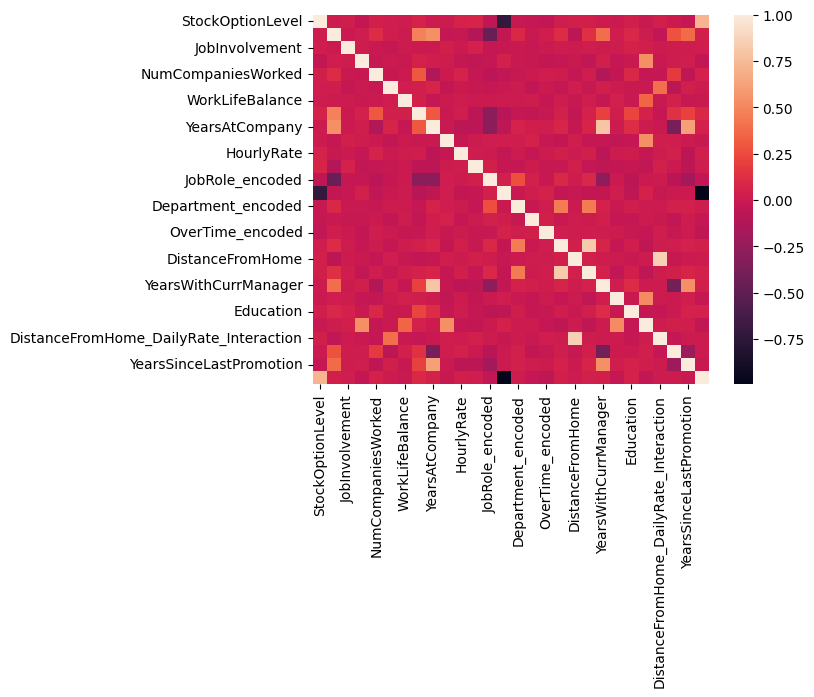

In [211]:
sns.heatmap(X_train.corr())

In [234]:
combined_data = pd.concat([X_train, Y_train], axis=1)

# Calculate Pearson correlation matrix
correlation_matrix = combined_data.corr()
target_correlation = correlation_matrix['Attrition'].sort_values(ascending=False)
target_correlation[1:]

JobRole_encoded                           0.216590
MaritalStatus_encoded                     0.181350
OverTime_encoded                          0.173965
BusinessTravel_encoded                    0.116391
EducationField_encoded                    0.067282
Income_per_EducationField                 0.055576
Department_encoded                        0.055326
NumCompaniesWorked                        0.037127
Income_Growth_Rate                        0.029031
DistanceFromHome                          0.024741
DistanceFromHome_DailyRate_Interaction    0.013490
DailyRate                                -0.022380
PercentSalaryHike                        -0.031571
HourlyRate                               -0.037280
YearsSinceLastPromotion                  -0.038496
WorkLifeBalance                          -0.045365
JobSatisfaction                          -0.061010
Education                                -0.084305
RelationshipSatisfaction                 -0.087537
EnvironmentSatisfaction        

#### Model Training

Building Base Model

In [ ]:
# Setting a base model using random forest classifier and using gridsearchCV to find the best parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'ccp_alpha':[0.0, 0.1, 0.2],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4]}

roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True)

rf_classifier = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator= rf_classifier, param_grid=param_grid, cv=5, scoring=roc_auc_scorer, verbose=2)

grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_roc_auc = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best ROC AUC:", best_roc_auc)


In [53]:
# Splitting data to training and testing set
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.33, random_state = 42)

# setting parameters and training model
class_weights = {0: 1, 1: 2}
rf_classifier = RandomForestClassifier(n_estimators = 100, 
                                       max_depth = 5,
                                       class_weight = class_weights, 
                                       random_state = 42)
model = rf_classifier.fit(x_train, y_train)

In [54]:
prediction_prob = model.predict_proba(x_test)[:, 1]
roc_score = roc_auc_score(y_test, prediction_prob)
roc_score

0.8333482743164501

#### Feature Engineering

In [44]:
# add Distance from home feature 
X_train = pd.concat([X_train, Employee['DistanceFromHome']], axis = 1)

# engineering a new column income per education field 
X_train['Income_per_EducationField'] = X_train.groupby('EducationField_encoded')['MonthlyIncome'].transform('mean')

# YearwithCurrManager
X_train = pd.concat([X_train, Employee['YearsWithCurrManager']], axis = 1)

# Environment satisfaction
X_train = pd.concat([X_train, Employee['EnvironmentSatisfaction']], axis = 1)

#YearsSinceLastPromotion
X_train = pd.concat([X_train, Employee['YearsSinceLastPromotion']], axis = 1)

#Education
X_train = pd.concat([X_train, Employee['Education']], axis = 1)

#calculating Satisfaction Score
satisfaction_cols = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']
X_train['Satisfaction_Score'] = X_train[satisfaction_cols].mean(axis=1)

#Daily compensation
X_train['DistanceFromHome_DailyRate_Interaction'] = X_train['DistanceFromHome'] * X_train['DailyRate']

#income growth rate
X_train['Income_Growth_Rate'] = (X_train['MonthlyIncome'] * 12) / X_train['YearsAtCompany'].replace(0, 1)
                                                                                                   
#Income_per_MaritalStaatus
X_train['Income_per_MaritalStaatus'] = X_train.groupby('MaritalStatus_encoded')['MonthlyIncome'].transform('mean')

In [297]:
X_train.drop('Mean_Incomerate_By_JobRole', axis = 1, inplace = True)

In [201]:
X_train

,StockOptionLevel,MonthlyIncome,JobInvolvement,RelationshipSatisfaction,NumCompaniesWorked,DailyRate,WorkLifeBalance,Age,YearsAtCompany,JobSatisfaction,HourlyRate,PercentSalaryHike,JobRole_encoded,MaritalStatus_encoded,Department_encoded,BusinessTravel_encoded,OverTime_encoded,EducationField_encoded,DistanceFromHome,Income_per_EducationField,YearsWithCurrManager,EnvironmentSatisfaction,Education,Satisfaction_Score,DistanceFromHome_DailyRate_Interaction,Income_Growth_Rate,YearsSinceLastPromotion,Income_per_MaritalStaatus,stockoption_per_MaritalStaatus
0,1,2596,3,2,1,599,3,36,10,4,42,13,0.182635,0.090556,0.107969,0.195402,0.220000,0.114754,24,6204.901639,8,4,3,3.25,14376,3115.200000,7,6262.439845,0.957309
1,1,2899,3,4,1,921,3,35,4,1,46,17,0.337662,0.090556,0.142251,0.111628,0.087706,0.073171,8,5435.304878,3,1,3,2.25,7368,8697.000000,0,6262.439845,0.957309
2,2,4627,3,4,0,718,3,32,3,4,80,17,0.107042,0.048930,0.142251,0.111628,0.087706,0.171053,26,7750.743421,2,3,3,3.50,18668,18508.000000,1,6433.211009,1.437309
3,0,5347,3,3,3,1488,1,38,6,1,40,14,0.064516,0.090556,0.107969,0.111628,0.087706,0.114754,2,6204.901639,2,3,3,2.00,2976,10694.000000,0,6262.439845,0.957309
4,0,19033,3,3,1,1017,3,50,31,1,37,13,0.081081,0.197574,0.107969,0.111628,0.220000,0.114754,5,6204.901639,10,2,4,2.25,5085,7367.612903,4,5972.701906,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,0,8722,3,2,1,945,4,30,10,3,73,19,0.107042,0.197574,0.142251,0.111628,0.087706,0.113548,1,6049.067097,8,4,3,3.25,945,10466.400000,0,5972.701906,0.000000
1673,1,3544,3,4,4,1303,4,32,4,2,48,19,0.122093,0.090556,0.107969,0.111628,0.087706,0.113548,2,6049.067097,3,1,3,2.75,2606,10632.000000,1,6262.439845,0.957309
1674,0,2804,2,3,1,1184,3,29,1,1,36,11,0.205882,0.090556,0.179487,0.195402,0.220000,0.230769,24,8207.615385,0,2,3,2.25,28416,33648.000000,0,6262.439845,0.957309
1675,2,5406,4,3,1,441,2,36,10,3,48,21,0.107042,0.048930,0.142251,0.111628,0.087706,0.171053,9,7750.743421,8,2,2,2.50,3969,6487.200000,0,6433.211009,1.437309


In [288]:
# Assuming 'data' is your DataFrame
X_train['Mean_Incomerate_By_JobRole'] = X_train.groupby('JobRole_encoded')['Income_Growth_Rate'].transform('mean')

#### Training different models

Trainin XGBoost model

In [ ]:
# using XGBoost classifier and gridsearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate':[0.01, 0.1, 0.2],
    'max_depth':[3, 5, 7],
    'gamma':[0, 0.1, 0.2],
    'scale_pos_weight':[1,2,5]}

roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True)

xgb = XGBClassifier(random_state= 42)
grid_search = GridSearchCV(estimator= xgb, param_grid=param_grid, cv=5, scoring=roc_auc_scorer, verbose=2)

grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_roc_auc = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best ROC AUC:", best_roc_auc)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, scale_pos_weight=1; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, scale_pos_weight=2; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, scale_pos_weight=2; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, scale_pos_weight=2; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, scale_pos_we

In [176]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.33, random_state = 42)
xgb = XGBClassifier(objective = 'binary:logistic', 
                    n_estimators = 200, random_state = 42, 
                    scale_pos_weight = 5)
model = xgb.fit(x_train, y_train)

In [177]:
prediction_prob = model.predict_proba(x_test)[:, 1]
roc_score = roc_auc_score(y_test, prediction_prob)
roc_score

0.8226505304049005

Training LightGB Model

In [298]:
# using Light gb model
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.33, random_state = 42)
lgb_classifier = lgb.LGBMClassifier(n_estimators = 60,
                                    learning_rate = 0.3,
                                    num_leaves = 3,
                                    min_gain_to_split = 3,
                                    boosting_type = 'gbdt',
                                    class_weight={0: 1, 1:2},
                                    random_state = 42,
                                    min_data_in_leaf = 20,
                                    max_bin = 25, 
                                    feature_fraction = 0.5,
                                    bagging_freq = 20, 
                                    bagging_fraction = 0.8)

#model = lgb_classifier.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=3, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=20, subsample_freq=0 will be ignored. Current value: bagging_freq=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=3, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3
[LightGBM] [Warning] bagging_fraction is 

In [299]:
prediction_prob = model.predict_proba(x_test)[:, 1]
roc_score = roc_auc_score(y_test, prediction_prob)
roc_score

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=3, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=20, subsample_freq=0 will be ignored. Current value: bagging_freq=20


0.8571940833706858

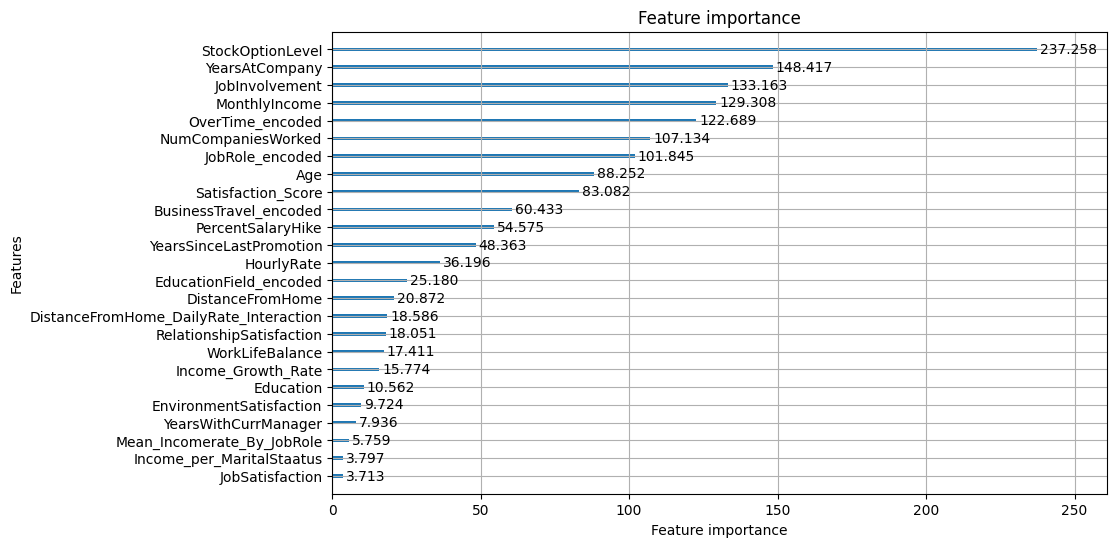

In [293]:
lgb.plot_importance(model , importance_type='gain', figsize=(10, 6), max_num_features=28)
plt.show()

In [271]:
XX_train = X_train[['StockOptionLevel', 'JobRole_encoded', 'Satisfaction_Score', 'Age', 'MonthlyIncome', 
                    'BusinessTravel_encoded','YearsWithCurrManager', 'OverTime_encoded', 'JobInvolvement',
                    'NumCompaniesWorked', 'YearsAtCompany', 'YearsSinceLastPromotion', 'Income_Growth_Rate', 
                    'PercentSalaryHike', 'WorkLifeBalance', 'RelationshipSatisfaction']]

In [ ]:
XX_train

In [292]:
# Train entire dataset
model = lgb_classifier.fit(X_train, Y_train)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=3, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=20, subsample_freq=0 will be ignored. Current value: bagging_freq=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=3, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3
[LightGBM] [Warning] bagging_fraction is 

#### LightGB is the best performing model so far

Training a CatBoost Model

In [311]:
# using catboost model
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.33, random_state = 42)
catboost_model = CatBoostClassifier(iterations = 100,  
                                    learning_rate = 0.02,  
                                    depth = 10, 
                                    random_seed = 42,
                                    colsample_bylevel = 0.8,
                                    scale_pos_weight = 1.5,
                                    max_leaves = 31,
                                    l2_leaf_reg = 8,
                                    subsample = 1.0)

# Train the model
catboost_model.fit(x_train, y_train, eval_set=(x_test, y_test), early_stopping_rounds=10, verbose=100)

# Make predictions on the test set
y_test_pred = catboost_model.predict_proba(x_test)[:, 1]

0:	learn: 0.6779809	test: 0.6797776	best: 0.6797776 (0)	total: 11.3ms	remaining: 1.12s
99:	learn: 0.2368614	test: 0.3724699	best: 0.3724699 (99)	total: 1.96s	remaining: 0us

bestTest = 0.3724698745
bestIteration = 99



In [312]:
roc_score = roc_auc_score(y_test, y_test_pred)
roc_score

0.8411773494695951

In [310]:
# Training model on the entire dataset
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)


catboost_model = CatBoostClassifier(iterations = 100,  
                                    learning_rate = 0.02,  
                                    depth = 10, 
                                    random_seed = 42,
                                    colsample_bylevel = 0.8,
                                    scale_pos_weight = 1.5,
                                    max_leaves = 31,
                                    l2_leaf_reg = 8,
                                    subsample = 1.0)
catboost_model.fit(X_train_split, y_train_split, eval_set=(X_val_split, y_val_split), verbose=50)

# Make predictions on the validation set
y_val_pred_proba = catboost_model.predict_proba(X_val_split)[:, 1]
y_val_pred = catboost_model.predict(X_val_split)

roc_auc = roc_auc_score(y_val_split, y_val_pred_proba)
print(f'Validation ROC-AUC Score: {roc_auc:.4f}')

0:	learn: 0.6771590	test: 0.6794793	best: 0.6794793 (0)	total: 13.1ms	remaining: 1.3s
50:	learn: 0.3389233	test: 0.4208045	best: 0.4208045 (50)	total: 968ms	remaining: 930ms
99:	learn: 0.2397953	test: 0.3789224	best: 0.3789224 (99)	total: 1.99s	remaining: 0us

bestTest = 0.3789224137
bestIteration = 99

Validation ROC-AUC Score: 0.8354


#### Making prediction on test set

In [416]:
Employee_test = pd.read_csv(r'C:\Users\hp\Downloads\bct-data-summit (1)\test.csv')

In [417]:
X_test = Employee_test.loc[:, best_features.index].drop('id', axis = 1)

In [418]:
X_test

,StockOptionLevel,JobRole,MonthlyIncome,JobInvolvement,RelationshipSatisfaction,NumCompaniesWorked,DailyRate,EmployeeCount,Department,WorkLifeBalance,Age,YearsAtCompany,JobSatisfaction,HourlyRate,MaritalStatus,PercentSalaryHike
0,0,Laboratory Technician,2318,3,4,1,992,1,Research & Development,2,19,1,3,43,Single,12
1,1,Sales Executive,5486,3,3,6,1136,1,Sales,3,45,2,1,67,Divorced,12
2,2,Research Scientist,2741,3,2,4,155,1,Research & Development,2,37,7,4,41,Divorced,13
3,0,Healthcare Representative,5228,2,3,1,688,1,Research & Development,2,32,14,3,89,Single,13
4,0,Laboratory Technician,1223,3,1,1,464,1,Research & Development,3,29,1,4,79,Single,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,1,Sales Representative,4678,2,3,1,755,1,Sales,3,31,1,4,81,Divorced,12
1115,1,Laboratory Technician,6220,2,4,1,654,1,Research & Development,3,40,20,4,96,Married,14
1116,1,Healthcare Representative,5238,3,1,3,884,1,Research & Development,2,42,5,1,65,Married,17
1117,1,Sales Executive,4799,2,4,0,1469,1,Sales,3,25,4,4,68,Married,11


In [419]:
df2 = Employee_test.copy()

In [420]:
#Encoding marital status
encoder = TargetEncoder()
df2['MaritalStatus_encoded'] = encoder.fit_transform(df2['MaritalStatus'], df2['id'])

#Encoding Department
encoder = TargetEncoder()
df2['Department_encoded'] = encoder.fit_transform(df2['Department'], df2['id'])

In [421]:
X_test = pd.concat([X_test, df2[['MaritalStatus_encoded', 'Department_encoded']]], axis = 1)
X_test.drop(['MaritalStatus', 'Department'], axis = 1, inplace = True)

In [422]:
# Encoding JobRole using target encoding (regularized encoding)
df2 = Employee_test.copy()
encoder = TargetEncoder()
df2['JobRole_encoded'] = encoder.fit_transform(df2['JobRole'], df2['id'])
print(df2['JobRole_encoded'].value_counts())
X_test = pd.concat([X_test, df2['JobRole_encoded']], axis = 1)
X_test.drop('JobRole', axis = 1, inplace = True)

JobRole_encoded
2251.916667    240
2226.926087    230
2248.669565    230
2246.452351    117
2171.336891    112
2264.390292     71
2226.387842     46
2195.451229     44
2279.294373     29
Name: count, dtype: int64


In [423]:
# add Distance from home feature 
X_test = pd.concat([X_test, Employee_test['DistanceFromHome']], axis = 1)

# adding business travel
#encoder = TargetEncoder()
#X_test['BusinessTravel_encoded'] = encoder.fit_transform(Employee_test['BusinessTravel'], Employee_test[id])

# Adding Education Field feature
#X_test['EducationField_encoded'] = encoder.fit_transform(Employee_test['EducationField'],Employee_test[id])

# engineering a new column income per education field 
#X_test['Income_per_EducationField'] = X_test.groupby('EducationField_encoded')['MonthlyIncome'].transform('mean')

# Over Time feature
#X_test['OverTime_encoded'] = encoder.fit_transform(Employee_test['OverTime'], Employee_test[id])

# YearwithCurrManager
X_test = pd.concat([X_test, Employee_test['YearsWithCurrManager']], axis = 1)

# Environment satisfaction
X_test = pd.concat([X_test, Employee_test['EnvironmentSatisfaction']], axis = 1)

#Education
X_test = pd.concat([X_test, Employee_test['Education']], axis = 1)

#calculating Satisfaction Score
satisfaction_cols = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']
X_test['Satisfaction_Score'] = X_test[satisfaction_cols].mean(axis=1)

# Distance from Home
X_test = pd.concat([X_test, Employee_test['DistanceFromHome']], axis = 1)

#Daily compensation
#X_test['DistanceFromHome_DailyRate_Interaction'] = X_test['DistanceFromHome'] * X_test['DailyRate']

In [429]:
# add Distance from home feature 
X_test = pd.concat([X_test, Employee_test['DistanceFromHome']], axis = 1)

''''# Adding Business Travel feature
df3 = Employee_test['BusinessTravel']
print(df3.value_counts())
df3 = pd.get_dummies(df3)
df3.replace({True: 1, False:0}, inplace = True)

X_test = pd.concat([X_test, df3], axis = 1) '''

"'# Adding Business Travel feature\ndf3 = Employee_test['BusinessTravel']\nprint(df3.value_counts())\ndf3 = pd.get_dummies(df3)\ndf3.replace({True: 1, False:0}, inplace = True)\n\nX_test = pd.concat([X_test, df3], axis = 1) "

In [424]:
# adding business travel
df2['BusinessTravel_encoded'] = encoder.fit_transform(df2['BusinessTravel'], df2['id'])
X_test = pd.concat([X_test, df2['BusinessTravel_encoded']], axis = 1)

In [425]:
df5 = Employee_test['EducationField']

encoder = TargetEncoder()
df5 = encoder.fit_transform(df5, Employee_test['id'])
print(df5.value_counts())

X_test = pd.concat([X_test, df5], axis = 1)

# engineering a new column income per education field 
X_test['Income_per_EducationField'] = X_test.groupby('EducationField')['MonthlyIncome'].transform('mean')

# Years in current role
#X_test = pd.concat([X_test, Employee_test['YearsInCurrentRole']], axis =1)
#X_test = pd.concat([X_test, Employee_test['TotalWorkingYears']], axis =1)

# Over Time feature
df7 = Employee_test['OverTime']
le = LabelEncoder()
df7 = le.fit_transform(df7)
df7 = pd.Series(df7)
X_test = pd.concat([X_test, df7], axis = 1)
X_test.rename({0: 'OverTime_encoded'}, axis = 1, inplace = True)

# Standard Hours 
#X_test = pd.concat([X_test, Employee_test['StandardHours']], axis = 1)

EducationField
2223.183044       519
2249.553623       345
2201.676094       102
2257.031142        96
2289.210032        45
2258.399344        12
Name: count, dtype: int64


In [180]:
X_test.columns

Index(['StockOptionLevel', 'MonthlyIncome', 'JobInvolvement',
       'RelationshipSatisfaction', 'NumCompaniesWorked', 'DailyRate',
       'EmployeeCount', 'WorkLifeBalance', 'Age', 'YearsAtCompany',
       'JobSatisfaction', 'HourlyRate', 'PercentSalaryHike',
       'MaritalStatus_encoded', 'Department_encoded', 'JobRole_encoded',
       'DistanceFromHome', 'BusinessTravel_encoded', 'EducationField',
       'Income_per_EducationField', 'YearsInCurrentRole', 'TotalWorkingYears',
       'OverTime_encoded', 'StandardHours'],
      dtype='object')

In [181]:
# YearwithCurrManager
X_test = pd.concat([X_test, Employee_test['YearsWithCurrManager']], axis = 1)
# ENvironment satisfaction
X_test = pd.concat([X_test, Employee_test['EnvironmentSatisfaction']], axis = 1)
#Education
X_test = pd.concat([X_test, Employee_test['Education']], axis = 1)
#Joblevel
X_test = pd.concat([X_test, Employee_test['JobLevel']], axis = 1)
#YearsSinceLastPromotion
X_test = pd.concat([X_test, Employee_test['YearsSinceLastPromotion']], axis = 1)

In [430]:
#satisfaction_cols = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']
#X_test['Satisfaction_Score'] = X_test[satisfaction_cols].mean(axis=1)

#Daily compensation
X_test['DistanceFromHome_DailyRate_Interaction'] = X_test['DistanceFromHome'] * X_test['DailyRate']

# Education JobLevel interaction
#X_test['Education_JobLevel_Interaction'] = X_test['Education'] * X_test['JobLevel']

In [183]:
X_test['YearsAtCompany_Month'] = X_test['YearsAtCompany'] % 12
std_hourly_rate = x_test.groupby('YearsAtCompany')['HourlyRate'].std()
X_test['Std_HourlyRate_By_YearsAtCompany'] = X_test['YearsAtCompany'].map(std_hourly_rate)

In [512]:
X_test = pd.concat([X_test, Employee_test['YearsSinceLastPromotion']], axis = 1)
X_test = pd.concat([X_test, Employee_test['TotalWorkingYears']], axis = 1)


In [523]:
X_test = pd.concat([X_test, Employee_test['YearsSinceLastPromotion']], axis = 1)

In [559]:
test_predictions_proba = model.predict_proba(X_test)[:, 1] 
#test_predictions = model.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=3, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=20, subsample_freq=0 will be ignored. Current value: bagging_freq=20


In [560]:
prediction = pd.DataFrame(test_predictions_proba, columns = ['Attrition'])

In [561]:
prediction.value_counts()

Attrition
0.908093     2
0.144307     2
0.223492     2
0.225155     2
0.103931     2
            ..
0.338670     1
0.338887     1
0.339382     1
0.339422     1
0.981662     1
Name: count, Length: 1105, dtype: int64

In [562]:
submission = pd.concat([Employee_test['id'], prediction], axis = 1)

In [563]:
submission

,id,Attrition
0,1677,0.945211
1,1678,0.274883
2,1679,0.316179
3,1680,0.802942
4,1681,0.908093
...,...,...
1114,2791,0.815761
1115,2792,0.141461
1116,2793,0.416543
1117,2794,0.530041


In [564]:
submission.to_csv('Attrition Submission20.csv', index = False)

Note: improve the score and train with the whole dataset